# DAY-10
# Application of Logistic Regression 


## Importing all the required libraries

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       # Decision Tree algorithm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

## Loading the dataset

In [543]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")

In [544]:
# understanding the dataset
df.head(10)

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1


In [545]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [546]:
df.info

<bound method DataFrame.info of         ID               Name  Age  Gender          Location School_Grade  \
0        1    Shannon Francis   13  Female        Hansonfort          9th   
1        2    Scott Rodriguez   17  Female      Theodorefort          7th   
2        3        Adrian Knox   13   Other       Lindseystad         11th   
3        4  Brittany Hamilton   18  Female      West Anthony         12th   
4        5       Steven Smith   14   Other  Port Lindsaystad          9th   
...    ...                ...  ...     ...               ...          ...   
2995  2996        Jesus Yates   16  Female      New Jennifer         12th   
2996  2997     Bethany Murray   13  Female       Richardport          8th   
2997  2998      Norman Hughes   14   Other        Rebeccaton          7th   
2998  2999     Barbara Hinton   17  Female      Ramirezmouth          9th   
2999  3000     Curtis Johnson   17    Male    Lake Alexander         10th   

      Daily_Usage_Hours  Sleep_Hours  Acade

In [547]:
df.describe

<bound method NDFrame.describe of         ID               Name  Age  Gender          Location School_Grade  \
0        1    Shannon Francis   13  Female        Hansonfort          9th   
1        2    Scott Rodriguez   17  Female      Theodorefort          7th   
2        3        Adrian Knox   13   Other       Lindseystad         11th   
3        4  Brittany Hamilton   18  Female      West Anthony         12th   
4        5       Steven Smith   14   Other  Port Lindsaystad          9th   
...    ...                ...  ...     ...               ...          ...   
2995  2996        Jesus Yates   16  Female      New Jennifer         12th   
2996  2997     Bethany Murray   13  Female       Richardport          8th   
2997  2998      Norman Hughes   14   Other        Rebeccaton          7th   
2998  2999     Barbara Hinton   17  Female      Ramirezmouth          9th   
2999  3000     Curtis Johnson   17    Male    Lake Alexander         10th   

      Daily_Usage_Hours  Sleep_Hours  Aca

## Data Cleaning

In [548]:
#Checking for the missing values:
print(df.isnull().sum())

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64


In [549]:

print(df['Anxiety_Level'].value_counts())


Anxiety_Level
10    322
9     321
6     305
5     303
4     300
2     298
7     296
1     296
8     295
3     264
Name: count, dtype: int64


In [550]:
# There are no missing values in our dataset but if there were we would have done:
df.dropna()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [551]:
## Removing duplicates if there are any:
df.drop_duplicates()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [552]:
## Removing the irrelevant features
df.drop(['ID', 'Name', 'Location', 'Phone_Usage_Purpose'], axis=1,inplace=True)

In [553]:
## Applying interquartile range on numerical columns to handle outliers
num_cols = ['Daily_Usage_Hours','Sleep_Hours','Phone_Checks_Per_Day',
                'Weekend_Usage_Hours','Time_on_Social_Media','Time_on_Gaming',
                'Time_on_Education','Exercise_Hours','Anxiety_Level',
                'Depression_Level','Self_Esteem']
def remove_outliers_iqr(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quamtile(0.75)
        IQR = Q3-Q1
        df = df[(df[col]>=  Q1-1.5*IQR)&(df[col]<=Q3+1.5*IQR)]
        return df
    
    df = remove_outliers_iqr(df, num_cols)


In [554]:

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr()['Anxiety_Level'].sort_values(ascending=False))


Anxiety_Level             1.000000
Time_on_Education         0.024640
Depression_Level          0.018607
Phone_Checks_Per_Day      0.017988
Addiction_Level           0.016005
Time_on_Gaming            0.014677
Age                       0.014651
Family_Communication      0.011090
Sleep_Hours               0.009836
Apps_Used_Daily           0.007416
Weekend_Usage_Hours       0.006720
Exercise_Hours            0.004525
Social_Interactions       0.004341
Self_Esteem               0.003951
Academic_Performance      0.003427
Time_on_Social_Media     -0.002736
Screen_Time_Before_Bed   -0.004732
Daily_Usage_Hours        -0.007221
Parental_Control         -0.011530
Name: Anxiety_Level, dtype: float64


In [555]:
## Checking the correlation of all the columns with the target variable
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation of every feature with Anxiety_Level
target_corr = numeric_df.corr()['Anxiety_Level'].sort_values(ascending=False)
print("🔹 Correlation with Anxiety_Level:\n")
print(target_corr)


🔹 Correlation with Anxiety_Level:

Anxiety_Level             1.000000
Time_on_Education         0.024640
Depression_Level          0.018607
Phone_Checks_Per_Day      0.017988
Addiction_Level           0.016005
Time_on_Gaming            0.014677
Age                       0.014651
Family_Communication      0.011090
Sleep_Hours               0.009836
Apps_Used_Daily           0.007416
Weekend_Usage_Hours       0.006720
Exercise_Hours            0.004525
Social_Interactions       0.004341
Self_Esteem               0.003951
Academic_Performance      0.003427
Time_on_Social_Media     -0.002736
Screen_Time_Before_Bed   -0.004732
Daily_Usage_Hours        -0.007221
Parental_Control         -0.011530
Name: Anxiety_Level, dtype: float64


In [556]:
## Dropping the features having low correlation
low_corr_features = ['Time_on_Social_Media', 'Screen_Time_Before_Bed', 
                     'Daily_Usage_Hours', 'Parental_Control']

df = df.drop(columns=low_corr_features)


## Visualization

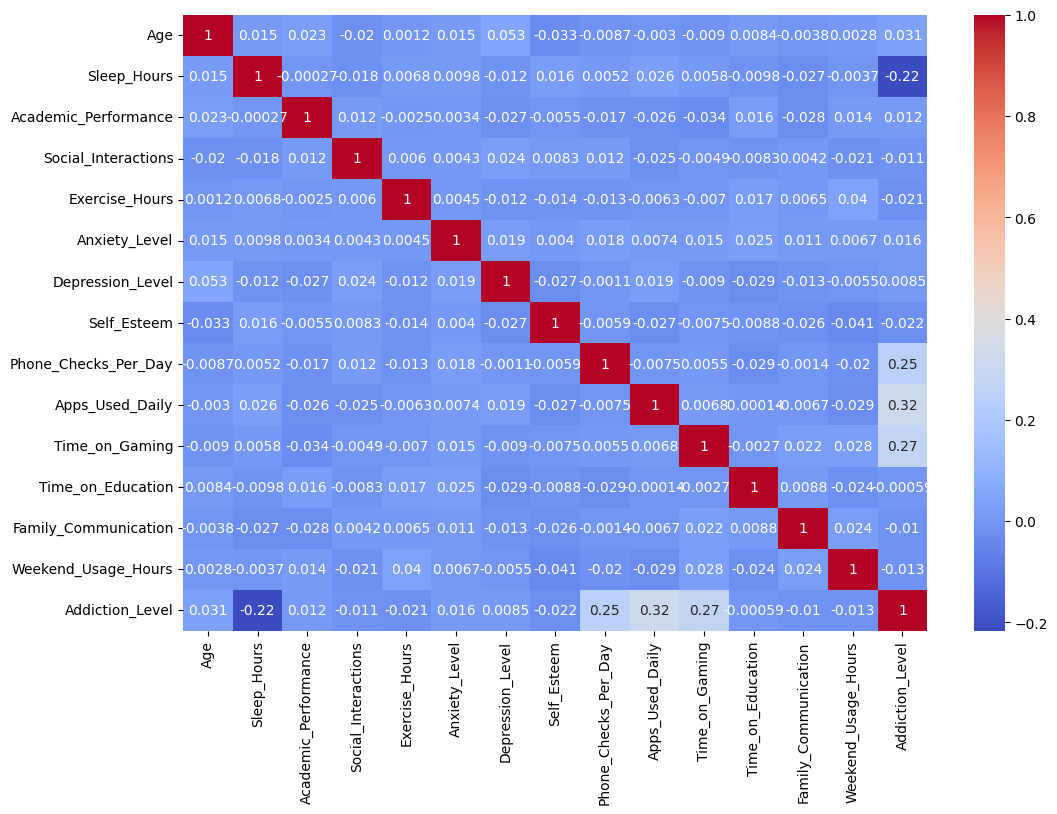

In [557]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now calculate correlation
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [558]:
## Checking the covariance between features
cov_matrix = numeric_df.cov()

# Display covariance matrix
print("🔹 Covariance between all features:\n")
print(cov_matrix)

🔹 Covariance between all features:

                           Age  Sleep_Hours  Academic_Performance  \
Age                   3.958066     0.043671              0.685964   
Sleep_Hours           0.043671     2.222226             -0.005974   
Academic_Performance  0.685964    -0.005974            215.624434   
Social_Interactions  -0.126413    -0.083762              0.544659   
Exercise_Hours        0.001734     0.007462             -0.027067   
Anxiety_Level         0.084258     0.042385              0.145455   
Depression_Level      0.301064    -0.049306             -1.117795   
Self_Esteem          -0.188824     0.070314             -0.229303   
Phone_Checks_Per_Day -0.653063     0.292516             -9.479595   
Apps_Used_Daily      -0.027526     0.181729             -1.769832   
Time_on_Gaming       -0.016639     0.008061             -0.462023   
Time_on_Education     0.010799    -0.009429              0.155912   
Family_Communication -0.021731    -0.115468             -1.171848  

## Feature Engineering:

In [559]:


df['Gaming_to_Education'] = df['Time_on_Gaming'] / (df['Time_on_Education'] + 0.1)




## Encoding Categorical Columns


In [560]:
df = pd.get_dummies(df, drop_first=True)

In [561]:
# Converting Anxiety_Level column first to categorical for better understanding
def categorize_anxiety(x):
    if x <= 5:
     return "Low"
    else:
     return "High"


df['Anxiety_Level'] = df['Anxiety_Level'].apply(categorize_anxiety)


In [571]:
# Now encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Anxiety_Level'])  # 0=Low, 1=Medium, 2=High


## Defining Features (x) and Traget Variable (y)


In [563]:
x = df.drop('Anxiety_Level', axis =1)
y = df['Anxiety_Level']

In [564]:
## Splitting the dataset into two parts : Train-Data and Test-Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)



## Feature Scaling

In [565]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Build and Training Logistic Regression Model


In [566]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                           class_weight='balanced', max_iter=1000)
model.fit(x_train,y_train)

C:\Users\ainaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [567]:
##from sklearn.tree import DecisionTreeClassifier

# Initialize model
##dt_model = DecisionTreeClassifier(
    ##terion='entropy',    # or 'gini'
    ##ax_depth=6,            # limit depth to prevent overfitting
    ##min_samples_split=5,
    ##min_samples_leaf=2,
    ##class_weight='balanced',  # helpful for imbalanced data
    ##random_state=42
##)

# Train model
##dt_model.fit(x_train, y_train)

# Predictions
##y_pred = dt_model.predict(x_test)


## Making Predictions

In [568]:
y_pred = model.predict(x_test)

## Evaluating Model Performance

In [569]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test, y_pred, average='weighted'))
print("Recall",recall_score(y_test,y_pred,average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy 0.4816666666666667
Precision 0.4814473513095756
Recall 0.4816666666666667
F1-score: 0.48125590754432457
Confusion Matrix:
 [[135 163]
 [148 154]]


In [570]:
##import pandas as pd

##importance = pd.Series(dt_model.feature_importances_, index=x_train.columns)
##print(importance.sort_values(ascending=False))
